<a href="https://colab.research.google.com/github/mitsu666/CausalImpact-demo-/blob/main/01_causalimpact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# install
!pip install tfcausalimpact

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from causalimpact import CausalImpact
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

os.chdir('/content/drive/My Drive/003_Project/703_シチズンデータサイエンス研修/20回')
print (os.getcwd())

/content/drive/My Drive/003_Project/703_シチズンデータサイエンス研修/20回


# 1. read_data

In [6]:
data = pd.read_csv('data.csv')

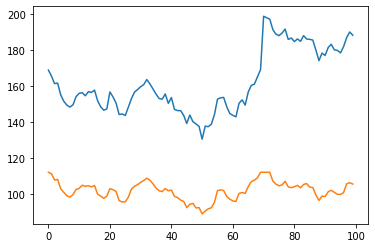

In [10]:
# 中身確認する
plt.plot(data)

# 2. config

In [8]:
pre_period = [0, 69] #cp前
post_period = [70, 99] #cp後

# 3. ソルバー実行

Instructions for updating:
Please use `StructuralTimeSeries.joint_distribution(observed_time_series).log_prob`
Instructions for updating:
Do not call `graph_parents`.
Instructions for updating:
`Predictive distributions returned by`tfp.sts.one_step_predictive` will soon compute per-timestep probabilities (treating timesteps as part of the batch shape) instead of a single probability for an entire series (the current approach, in which timesteps are treated as event shape). Please update your code to pass `timesteps_are_event_shape=False` (this will soon be the default) and to explicitly sum over the per-timestep log probabilities if this is required.
Instructions for updating:
`MultivariateNormalFullCovariance` is deprecated, use `MultivariateNormalTriL(loc=loc, scale_tril=tf.linalg.cholesky(covariance_matrix))` instead.
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    185.7              5571.04
Prediction (s.d.)     

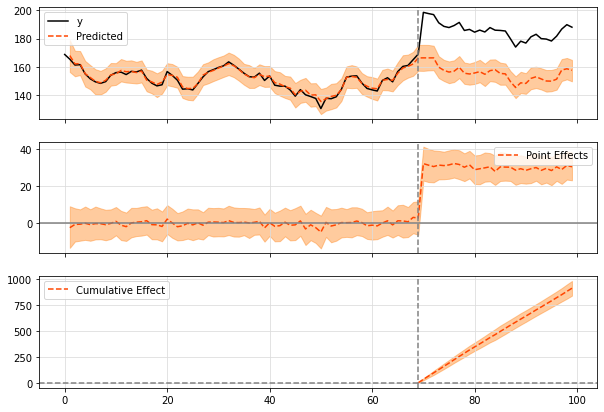

In [12]:
ci = CausalImpact(data, pre_period, post_period)
print(ci.summary())
print(ci.summary(output='report'))
ci.plot()

In [20]:
# MROI
cost = 400
print (f'MROI:{round(100*ci.summary_data.loc["abs_effect","cumulative"] / 400,2)} %')

MROI:227.04 %
